In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("coffee_shop_sales.csv")




In [4]:
# Convert DATE only
df["Order_Date"] = pd.to_datetime(df["Order_Date"])


In [5]:
df["Hour"] = pd.to_datetime(
    df["Order_Time"],
    format="%H:%M",
    errors="coerce"
).dt.hour

In [6]:
# Feature Engineering
df["Day"] = df["Order_Date"].dt.day
df["Month"] = df["Order_Date"].dt.month
df["Weekday"] = df["Order_Date"].dt.day_name()

# Day name (for Power BI)
df["Day_Name"] = df["Order_Date"].dt.day_name()

# Month name
df["Month_Name"] = df["Order_Date"].dt.month_name()

# Weekend flag
df["Is_Weekend"] = df["Day_Name"].isin(["Saturday", "Sunday"])

# Peak hour flag
# 6 AM – 11 AM and 4 PM – 11 PM
df["Peak_Hour"] = (
    df["Hour"].between(6, 11) |
    df["Hour"].between(16, 23)
)


In [7]:
# EDA
# Peak hour sales analysis
hourly_sales = df.groupby("Hour")["Total_Amount"].sum().sort_index()



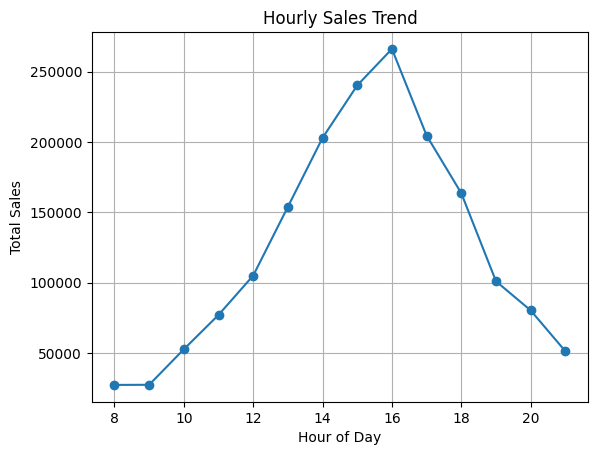

In [8]:

# Visualization
hourly_sales.plot(kind="line", marker="o")
plt.title("Hourly Sales Trend")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [9]:

# Location-wise performance
location_sales = df.groupby("Location")["Total_Amount"].sum()
print(location_sales.sort_values(ascending=False))


Location
Chennai       536735
Coimbatore    472210
Madurai       388816
Tanjore       354188
Name: Total_Amount, dtype: int64


In [10]:

# Top products
top_products = df.groupby("Product")["Total_Amount"].sum().sort_values(ascending=False)
print(top_products.head(5))

Product
Mocha          285510
Cold Coffee    255565
Latte          234485
Cappuccino     211350
Sandwich       201495
Name: Total_Amount, dtype: int64


In [11]:
df.to_csv("coffee_shop_sales_final.csv", index=False)